In [1]:
import cv2
import numpy as np
from CDA.dataset_reader import read_dataset
from CDA.CNN_denoiser import CNN_denoiser
import matplotlib.pyplot as plt

In [4]:
def add_noise(pure, pure_val, pure_test, noise_mean, noise_std, noise_prop):
    noise = np.random.normal(noise_mean, noise_std, pure.shape)  # np.random.poisson(1, pure.shape)
    noise_test = np.random.normal(noise_mean, noise_std, pure_test.shape) # np.random.poisson(1, pure_test.shape)
    noise_val = np.random.normal(noise_mean, noise_std, pure_val.shape) 
    noisy_input = pure + noise_prop * noise
    noisy_input_test = pure_test + noise_prop * noise_test
    noisy_input_val = pure_val + noise_prop * noise_val
    return noisy_input, noisy_input_val, noisy_input_test

In [2]:
batch_size = 32

train_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/datasets/chest_xray/train"
val_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/datasets/chest_xray/val"
test_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/datasets/chest_xray/test"

In [5]:
train_input = read_dataset(train_dir, img_height=224, img_width=224)
val_input = read_dataset(val_dir, img_height=224, img_width=224)
test_input = read_dataset(test_dir, img_height=224, img_width=224)

# Parse numbers as floats
train_input = train_input.astype('float32')
val_input = val_input.astype('float32')
test_input = test_input.astype('float32')

# Normalize data
train_input = train_input / 255
val_input = val_input / 255
test_input = test_input / 255


pure = train_input
pure_val = val_input
pure_test = test_input

noisy_input, noisy_input_val, noisy_input_test = add_noise(pure, pure_val, pure_test, noise_mean=0, noise_std=1, noise_prop=0.1)

In [6]:
print(pure.shape)

(5216, 224, 224)


In [7]:
# Create the model
cnn_denoiser = CNN_denoiser(batch_size=batch_size, nu_epochs=3,
                        img_height=224, img_width=224)


print("[LOG] Training and evaluating model...")
cnn_denoiser.train(noisy_input, pure, verbosity=1)
cnn_denoiser.evaluate(noisy_input_val, pure_val)

samples = noisy_input_test[:]
print("[LOG] Training and model evaluation completed\n[LOG] Denoising images test set...")
denoised_images = cnn_denoiser.predict(samples)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       147584    
                                                                 
 up_sampling2d (UpSampling2  (None, 112, 112, 128)     0

2023-11-13 21:56:22.176287: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


[LOG] Training and evaluating model...
Epoch 1/3
163/163 [==============================] - 462s 3s/step - loss: 0.5757 - accuracy: 0.0483
Epoch 2/3
163/163 [==============================] - 449s 3s/step - loss: 0.5657 - accuracy: 0.0484
Epoch 3/3
163/163 [==============================] - 450s 3s/step - loss: 0.5653 - accuracy: 0.0484
1/1 - 1s - loss: 0.5415 - accuracy: 0.0660 - 594ms/epoch - 594ms/step
[EVALUATION] Test loss: 0.5415166020393372
[EVALUATION] Test accuracy: 0.06603505462408066
[LOG] Training and model evaluation completed
[LOG] Denoising images test set...
20/20 [==============================] - 17s 859ms/step


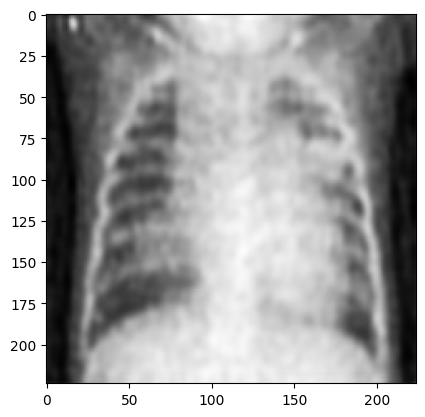

In [14]:
plt.imshow(denoised_images[0], plt.cm.gray)

In [15]:
denoised_images.shape

(624, 224, 224, 1)